In [1]:
import pandas as pd

image_features=pd.read_csv("..\image_features_mahmood\image_features.csv")

In [2]:
image_features=image_features.drop(image_features.columns[0], axis=1)
image_features.head()

,PetID,Energy,Contrast,Correlation,Entropy,Mean,Std_Dev,num_checkpoints
0,cf8d949f9-2,0.035198,205.034612,0.957454,7.365074,133.539156,52.617205,371
1,61d4dc56b-12,0.037368,96.525711,0.983005,7.061479,88.483483,56.524143,187
2,53923463d-9,0.036733,29.713199,0.995834,6.920583,88.724871,60.340616,251
3,0173c456c-8,0.020710,108.010620,0.984549,7.500592,87.555181,61.033249,722
4,fa7c7d1be-3,0.023931,106.188246,0.982613,7.396937,121.323948,56.922695,486


In [3]:
#clean petID column
image_features["PetID"]=image_features["PetID"].str.split("-", expand=True)[0]

image_features.head(3)

,PetID,Energy,Contrast,Correlation,Entropy,Mean,Std_Dev,num_checkpoints
0,cf8d949f9,0.035198,205.034612,0.957454,7.365074,133.539156,52.617205,371
1,61d4dc56b,0.037368,96.525711,0.983005,7.061479,88.483483,56.524143,187
2,53923463d,0.036733,29.713199,0.995834,6.920583,88.724871,60.340616,251


In [4]:
#Group by ID
image_features_transformed=image_features.groupby("PetID", as_index=False).mean()

In [5]:
sentiment_features=pd.read_csv("..\description_sentiment_features_luis\processed_train.csv")
sentiment_features.head()

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed,polarity,subjectivity
0,2,Nibble,3,299,0,1,1,7,0,1,...,100,41326,8480853f516546f6cf33aa88cd76c379,0,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,1.0,2,0.130357,0.407143
1,2,No Name Yet,1,265,0,1,1,2,0,2,...,0,41401,3082c7125d8fb66f7dd4bff4192c8b14,0,I just found it alone yesterday near my apartm...,6296e909a,2.0,0,0.100000,0.400000
2,1,Brisco,1,307,0,1,2,7,0,2,...,0,41326,fa90fa5b1ee11c86938398b60abc32cb,0,Their pregnant mother was dumped by her irresp...,3422e4906,7.0,3,0.261905,0.542857
3,1,Miko,4,307,0,2,1,2,0,2,...,150,41401,9238e4f44c71a75282e62f7136c6b240,0,"Good guard dog, very alert, active, obedience ...",5842f1ff5,8.0,2,0.341146,0.437500
4,1,Hunter,1,307,0,1,1,0,0,2,...,0,41326,95481e953f8aed9ec3d16fc4509537e8,0,This handsome yet cute boy is up for adoption....,850a43f90,3.0,2,0.400000,0.743750


In [6]:
sentiment_features.shape

(14993, 26)

In [7]:
image_features.shape, image_features_transformed.shape

((72776, 8), (18510, 8))

In [8]:
all_data=sentiment_features.merge(image_features_transformed, how="left", on="PetID")
all_data.head(3)

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,AdoptionSpeed,polarity,subjectivity,Energy,Contrast,Correlation,Entropy,Mean,Std_Dev,num_checkpoints
0,2,Nibble,3,299,0,1,1,7,0,1,...,2,0.130357,0.407143,0.035852,157.460689,0.986806,7.433718,95.712315,77.438182,482.000000
1,2,No Name Yet,1,265,0,1,1,2,0,2,...,0,0.100000,0.400000,0.022545,63.340863,0.993091,7.714046,102.676512,68.204360,187.500000
2,1,Brisco,1,307,0,1,2,7,0,2,...,3,0.261905,0.542857,0.030182,78.109415,0.982029,7.185988,142.957730,48.593305,296.857143


In [9]:
all_data.columns , len(all_data.columns)

(Index(['Type', 'Name', 'Age', 'Breed1', 'Breed2', 'Gender', 'Color1', 'Color2',
        'Color3', 'MaturitySize', 'FurLength', 'Vaccinated', 'Dewormed',
        'Sterilized', 'Health', 'Quantity', 'Fee', 'State', 'RescuerID',
        'VideoAmt', 'Description', 'PetID', 'PhotoAmt', 'AdoptionSpeed',
        'polarity', 'subjectivity', 'Energy', 'Contrast', 'Correlation',
        'Entropy', 'Mean', 'Std_Dev', 'num_checkpoints'],
       dtype='object'),
 33)

In [10]:
all_data[["Type",'Breed1', 'Breed2', 'Gender', 'Color1', 'Color2',
       'Color3', 'MaturitySize', 'FurLength', 'Vaccinated', 'Dewormed',
       'Sterilized', 'Health',"State","PetID"]].head()

,Type,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,State,PetID
0,2,299,0,1,1,7,0,1,1,2,2,2,1,41326,86e1089a3
1,2,265,0,1,1,2,0,2,2,3,3,3,1,41401,6296e909a
2,1,307,0,1,2,7,0,2,2,1,1,2,1,41326,3422e4906
3,1,307,0,2,1,2,0,2,1,1,1,2,1,41401,5842f1ff5
4,1,307,0,1,1,0,0,2,1,2,2,2,1,41326,850a43f90


In [11]:
all_data["FurLength"].unique()

array([1, 2, 3], dtype=int64)

In [12]:
# Import libraries
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Create a dummy dataframe with both categorical and numerical columns

columns_to_drop=["Name","Description","RescuerID"]
categorical_columns=["Type",'Breed1', 'Breed2', 'Gender', 'Color1', 'Color2',
       'Color3', 'MaturitySize', 'FurLength', 'Vaccinated', 'Dewormed',
       'Sterilized', 'Health',"State","PetID"]
numerical_columns=['polarity', 'subjectivity', 'Energy', 'Contrast', 'Correlation',
       'Entropy', 'Mean', 'Std_Dev', 'num_checkpoints','PhotoAmt','VideoAmt',"Age","Quantity","Fee"]

target=all_data["AdoptionSpeed"]
all_data=all_data.drop("AdoptionSpeed", axis=1)



#simple filling
all_data[categorical_columns] = all_data[categorical_columns].fillna("unknown")
all_data.fillna(all_data[numerical_columns].median(), inplace=True)
#all_data=all_data.fillna(0)

#transformation
all_data[categorical_columns]=all_data[categorical_columns].astype(str)
all_data[numerical_columns]=all_data[numerical_columns].astype(float)

all_data=all_data.drop(columns_to_drop, axis=1)

#normalize numerical columns:

for column in numerical_columns:
  all_data[numerical_columns] = (all_data[numerical_columns] - all_data[numerical_columns].mean()) / all_data[numerical_columns].std()


# Perform one-hot encoding on the categorical columns
encoder = OneHotEncoder(sparse=False)
encoded_cat = encoder.fit_transform(all_data[categorical_columns])
encoded_cat = pd.DataFrame(encoded_cat, columns=encoder.get_feature_names_out(categorical_columns))

# Concatenate the encoded categorical columns and the numerical columns
X = pd.concat([encoded_cat, all_data[numerical_columns]], axis=1)

# Perform PCA on the combined data
pca = PCA(n_components=14, )
pca_data = pca.fit_transform(X)


c:\Escritorio\Personal_brand\Data_Science\Portfolio\python_envs\projects_env\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [13]:
pca_data = pd.DataFrame(pca_data)


In [14]:
print(pca.explained_variance_ratio_)

print(pca.components_)


[0.11663179 0.07489694 0.06708838 0.06452002 0.0578784  0.05402035
 0.04491721 0.04183083 0.04082406 0.03427079 0.03340837 0.02477001
 0.02339944 0.02220481]
[[ 8.17088966e-02 -8.17088966e-02  7.04708462e-05 ...  2.05822487e-02
   3.70447849e-02 -9.81425858e-03]
 [ 1.13474132e-01 -1.13474132e-01 -3.74951539e-06 ...  3.73812962e-01
  -3.83703742e-01  1.78497342e-01]
 [ 3.06233848e-02 -3.06233848e-02  3.41109806e-05 ...  2.93767987e-01
  -2.44279375e-01  1.66007901e-01]
 ...
 [ 4.43870472e-02 -4.43870472e-02 -1.96781421e-05 ... -1.53039777e-01
   2.79365306e-02 -1.59348188e-03]
 [ 1.22534572e-01 -1.22534572e-01  1.86098608e-04 ...  2.66244814e-01
  -1.61974287e-01  7.03769061e-02]
 [ 1.27317507e-02 -1.27317507e-02 -5.84819129e-05 ... -9.56668670e-03
   2.41588314e-01  3.25926680e-02]]


In [15]:
print(pca.explained_variance_ratio_.round(2)[:10])

[0.12 0.07 0.07 0.06 0.06 0.05 0.04 0.04 0.04 0.03]


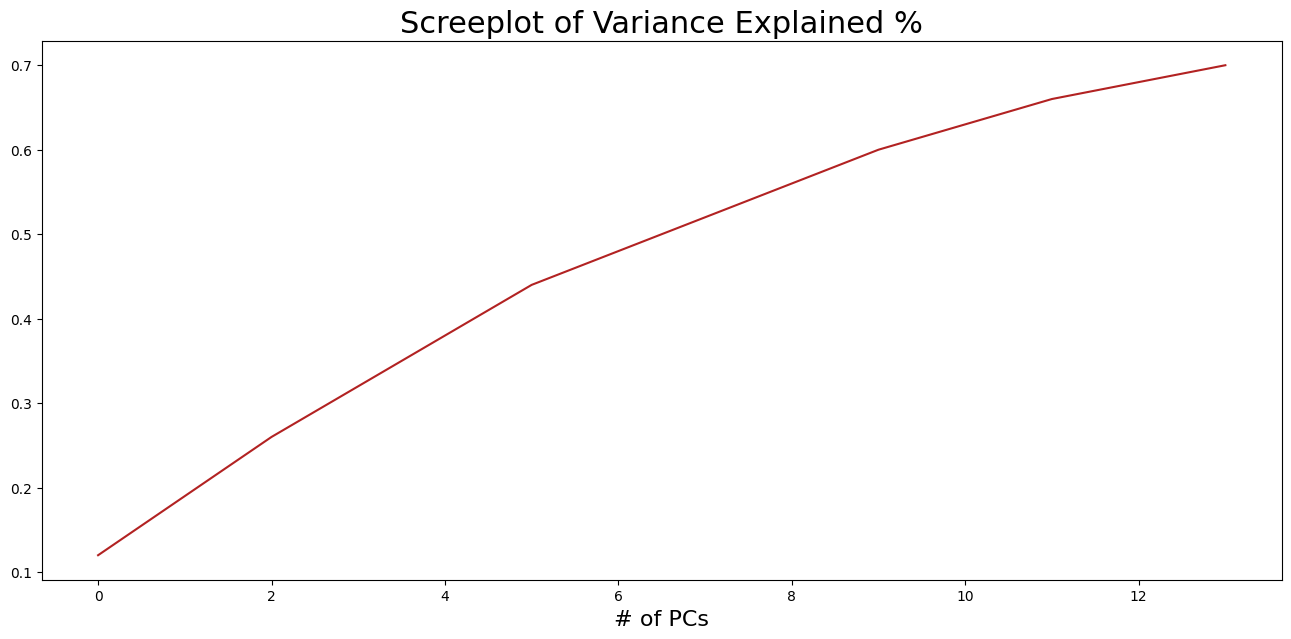

In [16]:
variance_exp_cumsum = pca.explained_variance_ratio_.cumsum().round(2)
fig, axes = plt.subplots(1,1,figsize=(16,7), dpi=100)
plt.plot(variance_exp_cumsum, color='firebrick')
plt.title('Screeplot of Variance Explained %', fontsize=22)
plt.xlabel('# of PCs', fontsize=16)
plt.show()

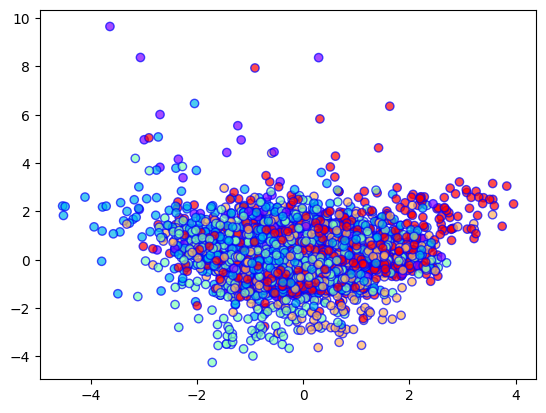

In [23]:
#LDA
# necessary import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
 

# divide the dataset into class and target variable
X = encoded_cat[:7000]
y = target[:7000]
 
# Preprocess the dataset and divide into train and test
le = LabelEncoder()
y = le.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
 
# apply Linear Discriminant Analysis
lda = LinearDiscriminantAnalysis(n_components=2)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)
 
# plot the scatterplot
plt.scatter(
    X_train[:,0],X_train[:,1],c=y_train,cmap='rainbow',
  alpha=0.7,edgecolors='b'
)
 


In [19]:
import prince

all_data.set_index("AdoptionSpeed", inplace=True)
all_data.drop("PetID", axis=1, inplace=True)
famd = prince.FAMD(
    n_components=2,
    n_iter=30,
    copy=True,
    check_input=True,
    random_state=42,
    engine="sklearn",
    handle_unknown="error"  # same parameter as sklearn.preprocessing.OneHotEncoder
)
famd = famd.fit(all_data)


KeyError: "None of ['AdoptionSpeed'] are in the columns"

In [ ]:
famd.row_coordinates(all_data).head()

c:\Escritorio\Personal_brand\Data_Science\Portfolio\python_envs\projects_env\Lib\site-packages\prince\pca.py:175: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[-0.04831586417117691, -0.030557635580048512, -0.03742530745851756, -0.043215022671359245, -0.05292737738381848, -0.2139034490603396, -0.2655175445509204, -0.07166400775380036, -0.13143336032566602, -0.021607511335679622, -0.17286009068543698, -0.3093724809269763, -0.09418495833363703, -0.06482253400703887, -0.17686510280477058, -0.09167290674014554, -0.10362598400398926, -0.10134821169943511, -0.2792305842888533, -0.09901805627536824, -0.20269642339887023, -0.17948546927922915, -0.20498685116596407, -0.08368553155607515, -0.29783898966235, -0.10803755667839812, -0.10585475476763696, -0.20384485425150073, -0.2750187202204366, -0.05716810144521737, -0.07485061491703512, -0.11433620289043474, -0.08909005154373803, -0.20949259494173822, -0.18206812674004247, -0.08084790439894733, -0.12599235916567242, 

component,0,1
AdoptionSpeed,,
2,5.386451,0.267948
0,-0.205140,6.950283
3,-4.230731,-1.565167
2,-2.793024,-4.327702
2,-0.917209,-3.753468


In [ ]:
famd.column_coordinates_

component,0,1
variable,,
Age,0.090891,0.070882
Quantity,0.066412,0.028835
Fee,0.010417,0.019446
VideoAmt,0.000014,0.001751
PhotoAmt,0.009474,0.011429
polarity,0.011581,0.001516
subjectivity,0.001618,0.000006
Energy,0.001177,0.000033
Contrast,0.022411,0.011206


In [ ]:
famd.plot(
    all_data[:1000],
    x_component=0,
    y_component=1
)

c:\Escritorio\Personal_brand\Data_Science\Portfolio\python_envs\projects_env\Lib\site-packages\prince\pca.py:175: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[-0.08366600265340755, nan, nan, -0.18708286933869708, nan, nan, -0.27748873851023215, nan, nan, nan, -0.1449137674618944, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, -0.11832159566199232, nan, -0.20493901531919198, nan, nan, nan, -0.1673320053068151, nan, nan, nan, -0.22135943621178658, nan, nan, nan, nan, nan, -0.31304951684997057, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, -0.23664319132398465, nan, nan, nan, nan, nan, nan, nan, nan, nan, -0.4183300132670378, -0.7436396977031283, -1.3281566172707193, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, -0.324037034920393, nan, nan, -0.34496376621320685, nan, nan, nan, nan, -0.43474130238568315, nan, nan, nan, nan, -1.6774981371077586, nan, nan

alt.LayerChart(...)

In [ ]:
famd.column_contributions_.style.format('{:.2%}')

component,0,1
variable,,
Age,0.40%,0.41%
Quantity,0.29%,0.17%
Fee,0.05%,0.11%
VideoAmt,0.00%,0.01%
PhotoAmt,0.04%,0.07%
polarity,0.05%,0.01%
subjectivity,0.01%,0.00%
Energy,0.01%,0.00%
Contrast,0.10%,0.07%
